In [1]:
import numpy as np
import pandas as pd
import datetime as dt
import time
import matplotlib.pyplot as plt
plt.set_cmap('bone')
from geopy import distance
from sklearn.cluster import DBSCAN
import time
import re
import folium
from matplotlib.ticker import MaxNLocator
from tqdm.notebook import tqdm
from IPython.display import display
cmap = plt.cm.bone

import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'


<Figure size 432x288 with 0 Axes>

In [2]:
from ipynb.fs.defs.ALL_data_preprocessing_FINAL_VERSION import time_converter, fix_UTC, duration_times_to_float, currency_converter, correcting_MAC, data_drop, label_generator, proportionalsplit, downsampling_to_days


In [3]:
df = pd.read_csv('C:\\Users\\User\\OneDrive - Danmarks Tekniske Universitet\\SAS_030919\\6. Semester\\BSc\\Bachelor2021\\data\\ChargePoint Data CY20Q4.csv', low_memory = False)

In [4]:
df = time_converter(df)
df = fix_UTC(df)
df = duration_times_to_float(df)
df = currency_converter(df)
df = correcting_MAC(df)
df = data_drop(df)


In [5]:
df = label_generator(df)
df['Label'] = 100

['BRYANT ' 'CAMBRIDGE ' 'HAMILTON ' 'HIGH ' 'MPL ' 'RINCONADA LIB '
 'SHERMAN ' 'TED THOMPSON ' 'WEBSTER ']


In [6]:
#df = df.head(20000)

In [7]:
start_time = time.time()
df_days = pd.concat([pd.DataFrame(v) for v in df.apply(proportionalsplit, axis=1).values]).reset_index(drop=True)
print("This bastard took", (time.time() - start_time)/60, "minutes to run...")

C:\Users\User\OneDrive - Danmarks Tekniske Universitet\SAS_030919\6. Semester\BSc\Bachelor2021\Notebooks\Final Notebooks\ALL_data_preprocessing_FINAL_VERSION.ipynb:399: RuntimeWarning: invalid value encountered in true_divide
  "      <td>PST</td>\n",


This bastard took 11.123806341489155 minutes to run...


In [8]:
df_days = downsampling_to_days(df_days)

In [9]:
df_days

,Start Date,Label,Charging Time (mins),Parking Time (mins),Energy (kWh),Fee (USD),CenterLon,CenterLat
0,2011-07-29,100,114.050000,183.533333,6.249457,0.000000,-122.160262,37.444549
1,2011-07-30,100,517.200000,686.650000,28.978653,0.000000,-122.160262,37.444549
2,2011-07-31,100,647.866667,725.983333,37.209163,0.000000,-122.160262,37.444549
3,2011-08-01,100,95.133333,203.566667,5.041244,0.000000,-122.160262,37.444549
4,2011-08-02,100,279.983333,280.316667,16.210423,0.000000,-122.160262,37.444549
...,...,...,...,...,...,...,...,...
3439,2020-12-27,100,2400.761389,2699.988253,210.606068,52.817263,-122.163024,37.422125
3440,2020-12-28,100,3398.338611,3641.428414,295.494932,71.662737,-122.163024,37.422125
3441,2020-12-29,100,4662.633333,5475.500000,371.171000,103.630000,-122.163024,37.422125
3442,2020-12-30,100,3564.200000,3809.650000,290.318000,68.980000,-122.163024,37.422125


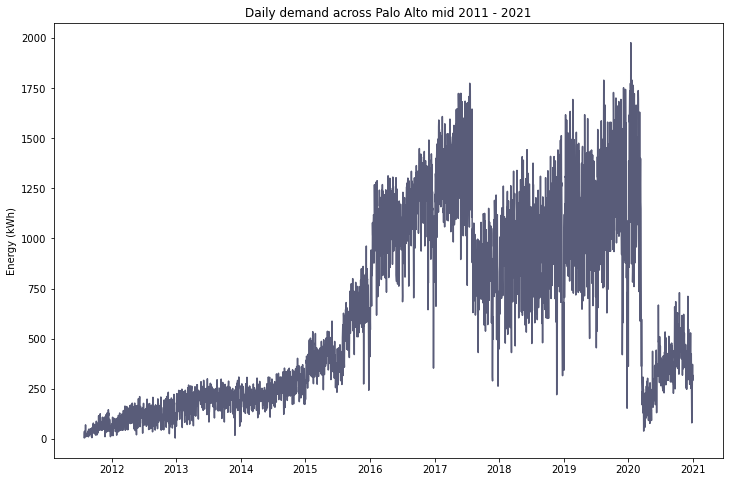

In [10]:
plt.rcParams['figure.figsize'] = [12, 8]
plt.plot(df_days['Start Date'], df_days['Energy (kWh)'], color = cmap(0.4))
plt.ylabel('Energy (kWh)')
plt.title('Daily demand across Palo Alto mid 2011 - 2021')
plt.show()